## Any Changes
Our goal was to "analyse and forecast the energy usage in an urban city". Since the previous milestone there has not been a change in the goal.

## Data
The source of the data is the following link: [LINK](https://data.world/houston/houston-electricity-bills)

There are 4 files, they are:
1. July 2011 to June 2012 excel file - 57,430 rows and 24 columns
2. May 2012 to April 2013 excel file - 65,806 rows and 24 columns
3. July 2012 to June 2013 excel file - 66,776 rows and 24 columns
4. July 2013 to June 2014 excel file - 67,838 rows and 24 columns

The data tables contain information regarding the building address, location, service number, billing dates, total amount due. 

The plan is to go through and clean the data tables individually and make them consistent. Once that is done the next step is to merge the cleaned data tables. After merging the tables one important check is to search for duplicates since there is an overlap of dates it is highly likely that there will be duplicates.

Description of each column 
1. Reliant Contract No: A unique identifier for each contract. 
2. Service Address: Address for the service location
3. Meter No: Meter number for the service location.
4. ESID: Electric Service Identifier for the service location.
5. Business Area: Business area code for the service location.
6. Cost Center: Cost center code for the service location.
7. Fund: Fund code for the service location.
8. Bill Type: Type of bill (e.g. "T" for "Total", "P" for "Partial", etc.). 
9. Bill Date: Date the bill was generated. 
10. Read Date: Date the meter was read. 
11. Due Date: Due date for the bill. 
12. Meter Read: Meter reading for the service location. 
13. Base Cost: TBase cost for the service. 
14. T&D Discretionary: Transmission and Distribution Discretionary charge for the service. 
15. T&D Charges: Transmission and Distribution charge for the service. 
16. Current Due: Current due amount for the service.
17. Index Charge: Index charge for the service. 
18. Total Due: Total due amount for the service. 
19. Franchise Fee: Franchise fee for the service. 
20. Voucher Date: Date the voucher was issued for the service. 
21. Billed Demand: Billed demand for the service in KVA. 
22. kWh Usage: Kilowatt-hour usage for the service. 
23. Nodal Cu Charge:  Nodal Cu Charge for the service. 
24. Adder Charge:  Adder Charge for the service.

Statistical Data Type of Each Column 
1. Reliant Contract No: integer (ratio)
2. Service Address: string (nominal)
3. Meter No: integer (nominal)
4. ESID: integer (nominal)
5. Business Area: integer (ratio))
6. Cost Center: integer (ratio)
7. Fund: integer (ratio)
8. Bill Type: string (nominal)
9. Bill Date: date (nominal)
10. Read Date: date (nominal)
11. Due Date: date (nominal)
12. Meter Read: integer (ratio)
13. Base Cost: float (nominal)
14. T&D Discretionary: float (nominal)
15. T&D Charges: float (nominal)
16. Current Due: float (nominal)
17. Index Charge: float (nominal)
18. Total Due: float (nominal)
19. Franchise Fee: float (nominal)
20. Voucher Date: date (nominal)
21. Billed Demand (KVA): integer (nominal)
22. kWh Usage: integer (nominal)
23. Nodal Cu Charge: float (nominal)
24. Adder Charge: float (nominal)

## Problem
The key issue in generating electricity is to determine how much capacity to generate in order to meet future demand. 

Electricity usage forecasting involves predicting the demand for electricity over a specific eriod. This process has several uses, including energy procurement, where it helps suppliers purchase the right amount of energy to ensure a steady supply.

The advancement of smart infrastructure and integration of distributed renewable power has raised future supply, demand, and pricing uncertainties. This unpredictability has increased interest in price prediction and energy analysis.

## Research Questions
1. Previous electricity usage data can be used for predicting the usage for future (Time-Series) - Hyndavi 
2. Group areas based on their energy consumption (Clustering) - Sunil
3. Electricity usage can be predicted by using correlated features (Regression) - Sourabh
4. Classification of bill type can be done using features in the data (Classification) - Sharmisha

## Import Statements

In [ ]:
!pip install xlrd

You are using pip version 18.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, f1_score

pd.options.display.max_columns=25

## Data FY 2012 - Hyndavi

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Insert, change the directory 
import sys
sys.path.insert(0,'/content/drive/MyDrive/CS418-Project-main')
%cd /content/drive/MyDrive/CS418-Project-main

/content/drive/MyDrive/CS418-Project-main


In [6]:
data_2012 = pd.read_excel('houston-houston-electricity-bills/coh-fy2012-ee-bills-july2011-june2012.xls')
orig_shape_2012 = data_2012.shape[0]

data_2012.shape

(57430, 24)

In [7]:
data_2012.head(5)

,Reliant Contract No,Service Address,Meter No,ESID,Business Area,Cost Center,Fund,Bill Type,Bill Date,Read Date,Due Date,Meter Read,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Adjustment ($),Total Due ($),Franchise Fee ($),Voucher Date,Billed Demand,kWh Usage,Nodal Cu Charge ($),Reliability Unit Charge ($)
0,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-06-26,2012-06-21,2012-07-26,47940.0,61070.65,1638.01,10440.86,73232.11,NaN,73232.11,-1047.28,2012-06-27,1507.291667,905421,82.59,0.0
1,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-05-25,2012-05-21,2012-06-24,47186.0,56319.47,1631.00,10364.63,68463.46,NaN,68463.46,-1045.21,2012-05-30,1496.907217,824107,148.36,0.0
2,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-04-27,2012-04-23,2012-05-27,46499.0,68461.63,1674.67,10676.79,80847.87,NaN,80847.87,-1081.11,2012-04-30,1562.500000,977744,34.78,0.0
3,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-03-27,2012-03-21,2012-04-26,45684.0,62036.29,1696.66,10681.48,74373.93,NaN,74373.93,-1087.32,2012-03-28,1567.708333,876838,-40.50,0.0
4,2059605,10518 BELLAIRE,303261,1008901000140050014100,2000,2000040005,8300,T,2012-02-27,2012-02-21,2012-03-28,44954.0,61670.24,1703.80,10707.94,74080.27,NaN,74080.27,-1090.08,2012-02-28,1577.083333,872898,-1.71,0.0


### Checking Nulls

In [ ]:
data_2012.isna().sum()

Reliant Contract No                0
Service Address                    0
Meter No                        7809
ESID                               0
Business Area                      0
Cost Center                        0
Fund                               0
Bill Type                          0
Bill Date                          0
Read Date                          0
Due Date                           0
Meter Read                         2
Base Cost ($)                      0
T&D Discretionary ($)              0
T&D Charges ($)                    0
Current Due ($)                    0
Adjustment ($)                 56259
Total Due ($)                      0
Franchise Fee ($)                  0
Voucher Date                       0
Billed Demand                      3
kWh Usage                          0
Nodal Cu Charge ($)                1
Reliability Unit Charge ($)        4
dtype: int64

### Checking Adjustment ($) column

In [ ]:
data_2012['Adjustment ($)'].value_counts(dropna=False)

NaN       56259
0.0        1170
9425.9        1
Name: Adjustment ($), dtype: int64

The column does not have any relevant information based on the above reported values. Electing to drop the column.

In [ ]:
data_2012.drop(columns=['Adjustment ($)'], inplace=True)

### Checking Unique Number of Customers

There are quite a few columns in the dataset that signify relating to a unique person/house/business. Checking the unique counts of such columns.

In [ ]:
check_unique_columns = ['Reliant Contract No', 'Service Address ', 'Meter No', 
                        'ESID', 'Business Area', 'Cost Center',]

for col in check_unique_columns:
    print(f'Number of Unique Values in {col}: {data_2012[col].nunique()}')

Number of Unique Values in Reliant Contract No: 5241
Number of Unique Values in Service Address : 5183
Number of Unique Values in Meter No: 4021
Number of Unique Values in ESID: 5241
Number of Unique Values in Business Area: 9
Number of Unique Values in Cost Center: 38


Based on the above reported values and further research online:

ESID signifies a unique ID provided to each customer subscribed to the electricity board. It would be best to choose ESID and Service Address columns going forward as these would provide number of unique customers and the areas (streets) where higher usage of electricity occurs.

Business Area signifies a grouping a number of buildings which covers a certain area. This would be useful usage patterns grouped by certain zones in the city.

### Checking Bill Type

In [ ]:
data_2012['Bill Type'].value_counts(dropna=False)

T    56859
P      552
C       19
Name: Bill Type, dtype: int64

Bill Type could signify the type of the connection given. Since commercial, residential and government spaces would have different type of pricing and needs this column could be capturing that information.

In [ ]:
data_2012['Service Address '].nunique(), data_2012['Meter No'].nunique(), data_2012['ESID'].nunique()

(5183, 4021, 5241)

The next 3 columns are: Bill Date, Read Date and Due Date. Of these it would be best to choose the Bill date across all the data files to keep the data consistent. 

### Electricity Usage Statistics

In [ ]:
data_2012[['Meter Read', 'Billed Demand ', 'kWh Usage']].describe()

,Meter Read,Billed Demand,kWh Usage
count,57428.000000,57427.000000,5.743000e+04
mean,10008.024135,52.581303,2.249732e+04
std,19208.052944,432.027165,2.216349e+05
min,0.000000,0.000000,0.000000e+00
25%,118.750000,0.000000,1.000000e+02
50%,2583.000000,0.000000,2.980000e+02
75%,7879.000000,11.000000,2.240000e+03
max,342348.000000,18495.555556,1.069344e+07


There are 3 columns that denote the amount of electricity: Meter Read, Billed Demand, kWh Usage.

Using kWh Usage as a standard unit of measurement.

In [ ]:
data_2012[[
    'Base Cost ($)', 'T&D Discretionary ($)', 'T&D Charges ($)', 
    'Current Due ($)', 'Total Due ($)', 'Franchise Fee ($)', 
    'Nodal Cu Charge ($)', 'Reliability Unit Charge ($)'
     ]].describe()

,Base Cost ($),T&D Discretionary ($),T&D Charges ($),Current Due ($),Total Due ($),Franchise Fee ($),Nodal Cu Charge ($),Reliability Unit Charge ($)
count,57430.000000,57430.000000,57430.000000,57430.000000,57430.000000,57430.000000,57429.000000,57426.0
mean,1557.590034,404.377159,322.324780,2292.520167,2326.005266,-36.249975,8.067123,0.0
std,15332.140262,12617.605024,2103.325682,23457.157709,23484.415824,255.356787,136.268511,0.0
min,0.000000,-44.990000,-680.340000,-64.210000,0.000000,-9352.010000,-367.210000,0.0
25%,6.870000,3.240000,7.380000,18.650000,18.430000,-5.740000,0.000000,0.0
50%,20.590000,3.910000,12.440000,38.240000,38.490000,-0.500000,0.010000,0.0
75%,155.252500,17.070000,98.847500,312.610000,317.212500,0.000000,0.280000,0.0
max,740473.960000,754326.010000,64282.330000,907483.660000,907483.660000,0.000000,18019.450000,0.0


Reliability Unit Charge does not contain any useful information. Electing to drop that column.

The columns other than Current Due or Total Due are adding up the value present in these two columns. Going forward choosing the column Total Due ($). 
Based on the above statistics the columns Current Due and Total Due represent the same value. 

### Selecting and Filtering Columns

In [ ]:
data_2012.columns

Index(['Reliant Contract No', 'Service Address ', 'Meter No', 'ESID',
       'Business Area', 'Cost Center', 'Fund', 'Bill Type', 'Bill Date',
       'Read Date', 'Due Date', 'Meter Read', 'Base Cost ($)',
       'T&D Discretionary ($)', 'T&D Charges ($)', 'Current Due ($)',
       'Total Due ($)', 'Franchise Fee ($)', 'Voucher Date', 'Billed Demand ',
       'kWh Usage', 'Nodal Cu Charge ($)', 'Reliability Unit Charge ($)'],
      dtype='object')

Based on the above analysis of the dataset choosing the following columns:

1. ESID
2. Business Area
3. Service Address 
3. Bill Type
4. Bill Date
5. Total Due ($)
6. kWh Usage

In [ ]:
data_2012 = data_2012[[
    'ESID', 'Business Area', 'Service Address ', 'Bill Type',
    'Bill Date', 'Total Due ($)', 'kWh Usage'
]]

In [ ]:
rename_cols = {
    'ESID': 'esid',
    'Business Area': 'business_area',
    'Service Address ': 'service_address',
    'Bill Type': 'bill_type',
    'Bill Date': 'bill_date',
    'Total Due ($)': 'total_due',
    'kWh Usage': 'kwh_usage'
}

data_2012_main = data_2012.rename(columns=rename_cols)

Checking for Nulls again and dtypes

In [ ]:
data_2012_main.isna().sum()

esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64

In [ ]:
data_2012_main.dtypes

esid                       object
business_area               int64
service_address            object
bill_type                  object
bill_date          datetime64[ns]
total_due                 float64
kwh_usage                   int64
dtype: object

In [ ]:
data_2012_main.shape

(57430, 7)

In [ ]:
zscore_2012 = stats.zscore(data_2012_main[['total_due', 'kwh_usage']])

zscore_2012

,total_due,kwh_usage
0,3.019310,3.983720
1,2.816252,3.616835
2,3.343602,4.310039
3,3.067930,3.854755
4,3.055426,3.836978
...,...,...
57425,-0.070053,-0.090029
57426,-0.070059,-0.090029
57427,-0.070064,-0.090029
57428,-0.070255,-0.090029


Each zscore value signifies how many standard deviations away an individual value is from the mean. This is a good indicator to finding outliers in the dataframe.

Usually z-score=3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than -3 is considered as outlier which is pretty much similar to standard deviation method

In [ ]:
data_2012_main = data_2012_main[(np.abs(zscore_2012) < 3).all(axis=1)]

data_2012_main.shape

(57025, 7)

The number of rows has decreased from 57,430 to 57,025. So 405 rows were outliers based on the data.

In [ ]:
data_2012_main.head(5)

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage
12,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-06-29,14890.12,161196
13,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-30,14468.32,155615
14,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-01,14024.32,142801
15,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-03-29,12986.58,131972
16,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-02-28,10612.81,100461


In [ ]:
orig_shape_2012 - data_2012_main.shape[0]

405

In [ ]:
data_2012_main.to_csv('electricity_usage_data_2012.csv', index=False)

The trend graph of both the cost and energy usage is the same as the value of cost = energy usage times the cost per unit.

# Merging the data

In [ ]:
data_2012_main = pd.read_csv('electricity_usage_data_2012.csv')
data_2013_main = pd.read_csv('electricity_usage_data_2013.csv')
data_2013_2_main = pd.read_csv('electricity_usage_data_2013_2.csv')
data_2014_main = pd.read_csv('electricity_usage_data_2014.csv')

In [ ]:
df_list = [data_2012_main, data_2013_main, data_2013_2_main, data_2014_main]

data = pd.concat(df_list)
print('data.shape', data.shape, '\n')

# Checking nulls in the data
print('Nulls in the data:\n', data.isna().sum(), '\n')

# Checking for duplicate rows
dup_rows_index = data.duplicated(subset=['esid', 'business_area', 'service_address', 'bill_date'])
print('duplicate rows', (dup_rows_index).sum(), '\n')

# Removing the duplicates
data_main = data[~(dup_rows_index)]
print('data_main.shape', data_main.shape, '\n')

# saving into csv files
data_main.to_csv('Electricity_Usage_Data.csv', index=False)

data.shape (257028, 7) 

Nulls in the data:
 esid               0
business_area      0
service_address    0
bill_type          0
bill_date          0
total_due          0
kwh_usage          0
dtype: int64 

duplicate rows 66180 

data_main.shape (190848, 7) 



# Time-Series - Hyndavi

Proposed Models:
1. VAR - can model multiple time series variables simultaneously and capture complex relationships between multiple time series variables. But this model can be sensitive to the number of lags used in the model.
2. ARIMA - Can capture the autocorrelation and trends in the time series data as well as seasonality. But it may not perform well with long term forecasting and requires turning to make it optimal
3. LSTM - can model complex relationships between time series data such as non-stationary and non-linear time series data. But it requires a lot of computational resources compared to the other models.

Currently still working on time-series analysis.

In [27]:
# Load the data
data_df = pd.read_csv('Electricity_Usage_Data.csv')
data_df.head()

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage
0,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-06-29,14890.12,161196.0
1,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-30,14468.32,155615.0
2,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-01,14024.32,142801.0
3,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-03-29,12986.58,131972.0
4,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-02-28,10612.81,100461.0


In [28]:
# Encode the categorical variables and derive month, year from the bill_date
address_enc = LabelEncoder()
bill_type_enc = LabelEncoder()

data_df['bill_date']=pd.to_datetime(data_df['bill_date'])
data_df['address_enc'] = address_enc.fit_transform(data_df['service_address'])
data_df['bill_type_enc'] = bill_type_enc.fit_transform(data_df['bill_type'])
data_df['year'] = data_df['bill_date'].apply(lambda x: x.year)
data_df['month'] = data_df['bill_date'].apply(lambda x: x.month)

data_df.head()

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage,address_enc,bill_type_enc,year,month
0,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-06-29,14890.12,161196.0,1630,2,2012,6
1,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-30,14468.32,155615.0,1630,2,2012,5
2,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-01,14024.32,142801.0,1630,2,2012,5
3,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-03-29,12986.58,131972.0,1630,2,2012,3
4,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-02-28,10612.81,100461.0,1630,2,2012,2


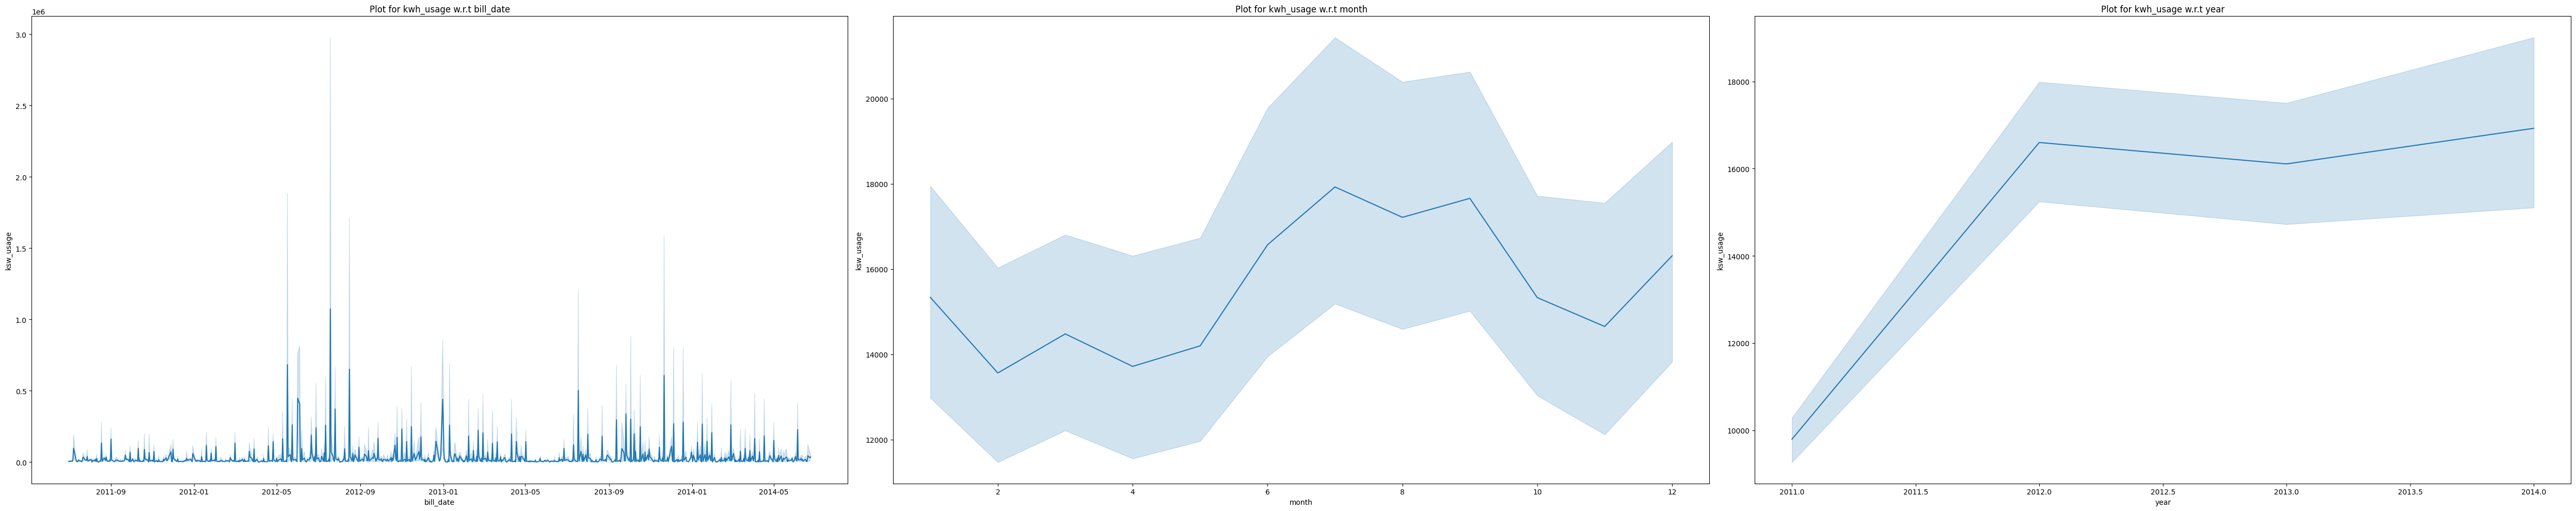

In [29]:
# Sample Analysis to analyse the kwh_usage w.rto year, month, and date
import seaborn as sns

# Create a matplotlib figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(50, 10))
axes = axes.flatten()
date_cols = ['bill_date', 'month', 'year']

# Plot each plot on a separate subplot
for i in range(len(date_cols)):
  sns.lineplot(data=data_df, x=date_cols[i], y='kwh_usage', ax=axes[i])
  axes[i].set_xlabel(date_cols[i])
  axes[i].set_ylabel('ksw_usage')
  axes[i].set_title('Plot for kwh_usage w.r.t {}'.format(date_cols[i]))

# Adjust the layout and spacing of the subplots
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-30-6a20fcf62f2a>:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  stats_df = data_df['kwh_usage']['2012-01-01':'2014-12-12']


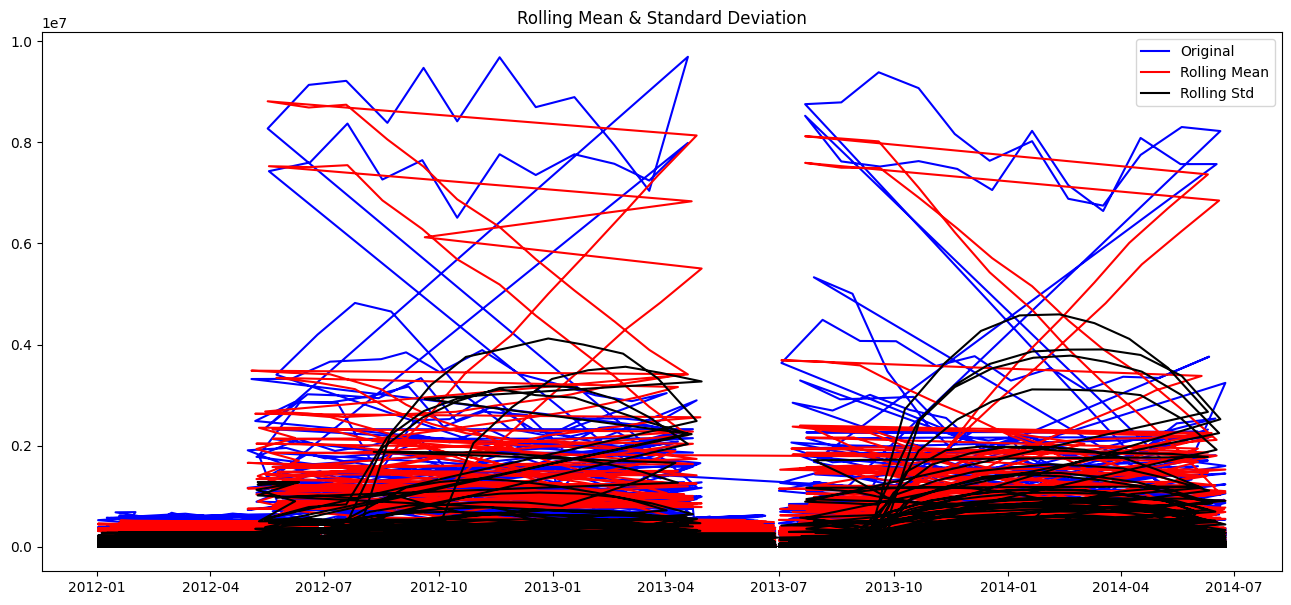

In [30]:
# How to see whether the series is a stationary time series - Rolling statistics (Mena should be constant over a time, same as std)

data_df.index = data_df['bill_date']
stats_df = data_df['kwh_usage']['2012-01-01':'2014-12-12']
stats_df

# Rolling statistics
rollmean = stats_df.rolling(10).mean()
rollstd = stats_df.rolling(10).std()

plt.figure(figsize=(16, 7))
fig = plt.figure(1)

orig = plt.plot(stats_df, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

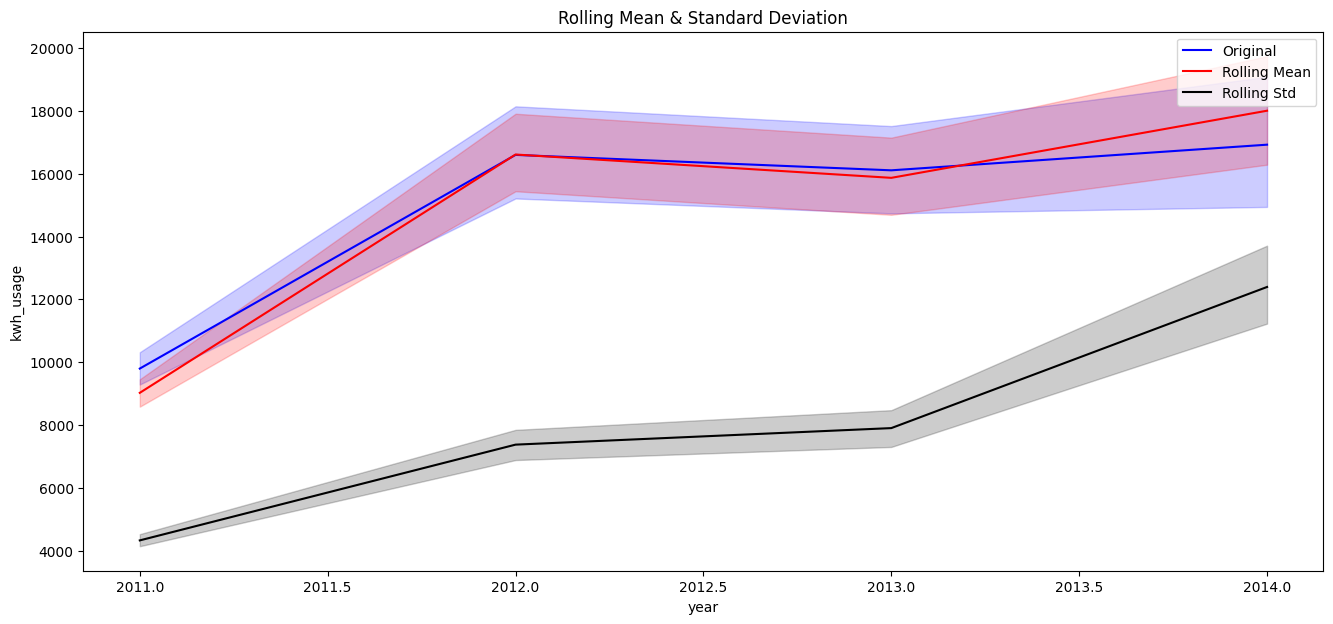

In [31]:
stats_df1 = data_df[['kwh_usage', 'year']]
stats_df1.index = data_df['year']
stats_df = stats_df1['kwh_usage']

# Rolling statistics
rollmean = stats_df.rolling(10).mean()
rollstd = stats_df.rolling(10).std()

plt.figure(figsize=(16, 7))
fig = plt.figure(1)

# orig = plt.plot(stats_df, color='blue', label='Original')
# mean = plt.plot(rollmean, color='red', label='Rolling Mean')
# std = plt.plot(rollstd, color='black', label='Rolling Std')
orig = sns.lineplot(stats_df, color='blue', label='Original')
mean = sns.lineplot(rollmean, color='red', label='Rolling Mean')
std = sns.lineplot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='year', ylabel='kwh_usage'>

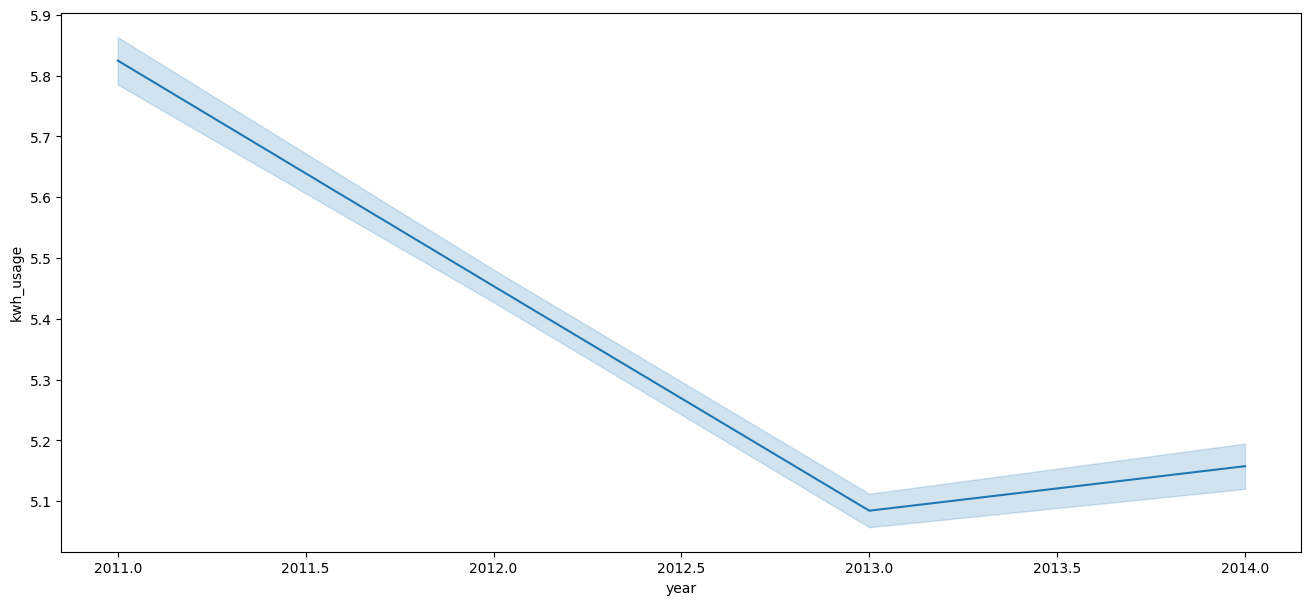

In [32]:
# Make Series Stationary
plt.figure(figsize=(16, 7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(stats_df)
# plt.plot(ts_log)
sns.lineplot(ts_log)

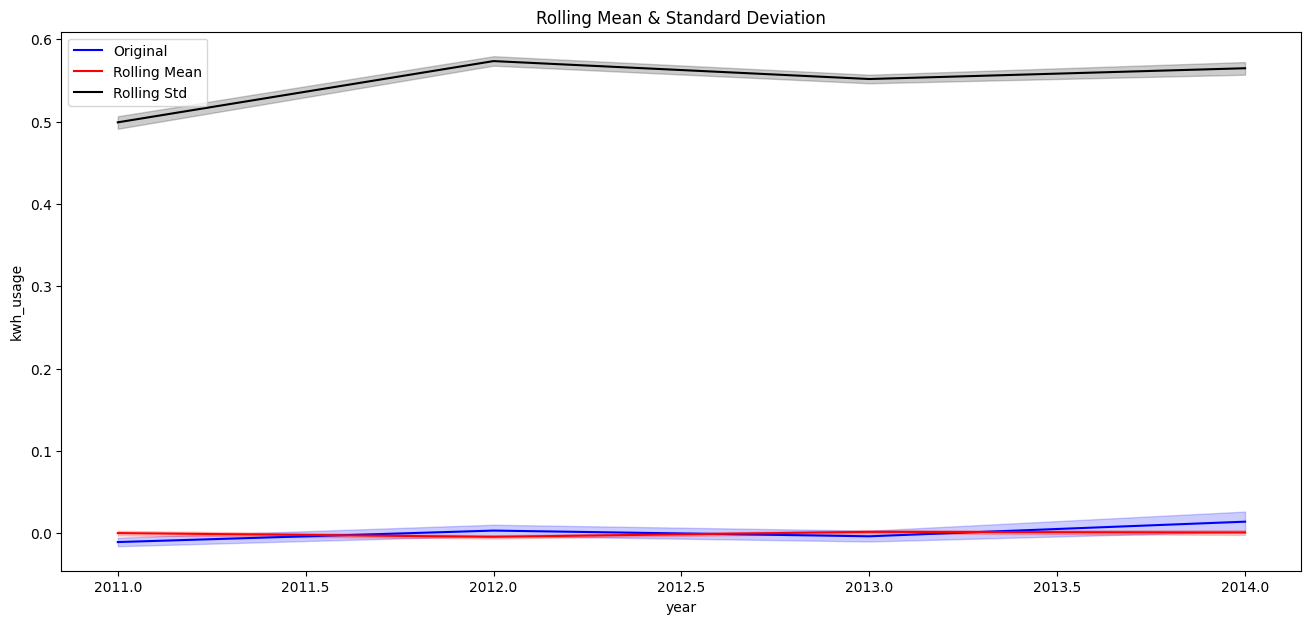

In [33]:
# lets try differencing

ts_log_diff = ts_log - ts_log.shift()
# plt.plot(ts_log_diff)

# Rolling statistics
rollmean = ts_log_diff.rolling(10).mean()
rollstd = ts_log_diff.rolling(10).std()

plt.figure(figsize=(16, 7))
fig = plt.figure(1)

# orig = plt.plot(ts_log_diff, color='blue', label='Original')
# mean = plt.plot(rollmean, color='red', label='Rolling Mean')
# std = plt.plot(rollstd, color='black', label='Rolling Std')
orig = sns.lineplot(ts_log_diff, color='blue', label='Original')
mean = sns.lineplot(rollmean, color='red', label='Rolling Mean')
std = sns.lineplot(rollstd, color='black', label='Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [34]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


/usr/local/lib/python3.9/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


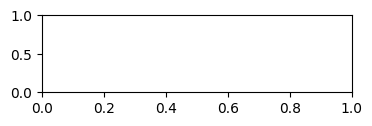

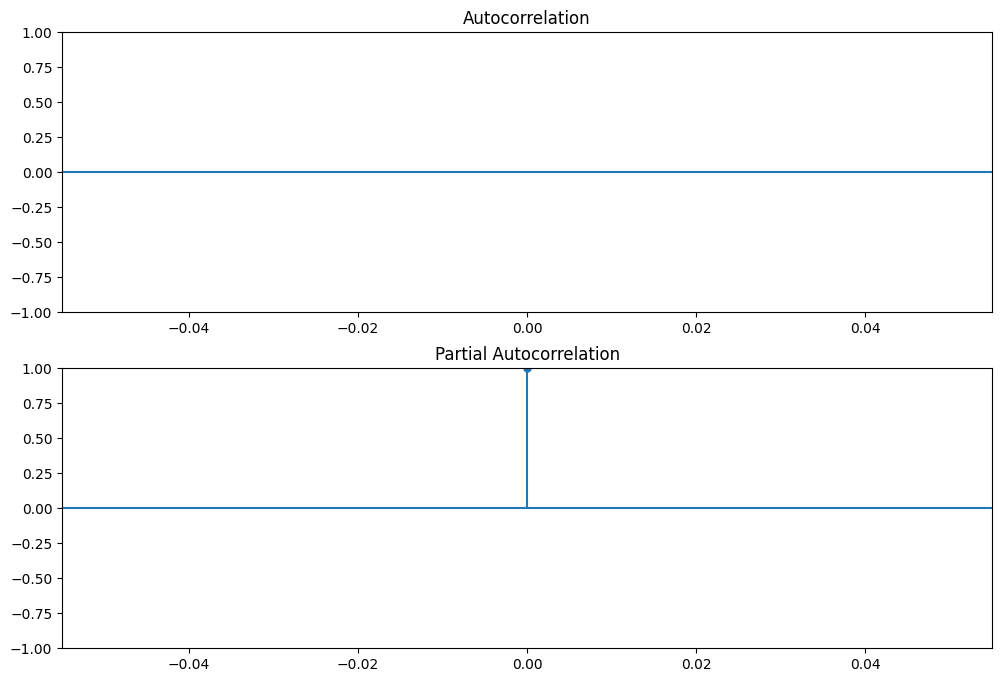

In [35]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

# ARIMA

In [36]:
data_df = pd.read_csv('Electricity_Usage_Data.csv')
address_enc = LabelEncoder()
bill_type_enc = LabelEncoder()

data_df['bill_date']=pd.to_datetime(data_df['bill_date'])
data_df['address_enc'] = address_enc.fit_transform(data_df['service_address'])
data_df['bill_type_enc'] = bill_type_enc.fit_transform(data_df['bill_type'])
data_df['year'] = data_df['bill_date'].apply(lambda x: x.year)
data_df['month'] = data_df['bill_date'].apply(lambda x: x.month)

data_df.head()

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage,address_enc,bill_type_enc,year,month
0,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-06-29,14890.12,161196.0,1630,2,2012,6
1,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-30,14468.32,155615.0,1630,2,2012,5
2,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-01,14024.32,142801.0,1630,2,2012,5
3,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-03-29,12986.58,131972.0,1630,2,2012,3
4,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-02-28,10612.81,100461.0,1630,2,2012,2


In [41]:
data_df['year'].value_counts()

2013    68916
2012    62397
2014    33023
2011    26512
Name: year, dtype: int64

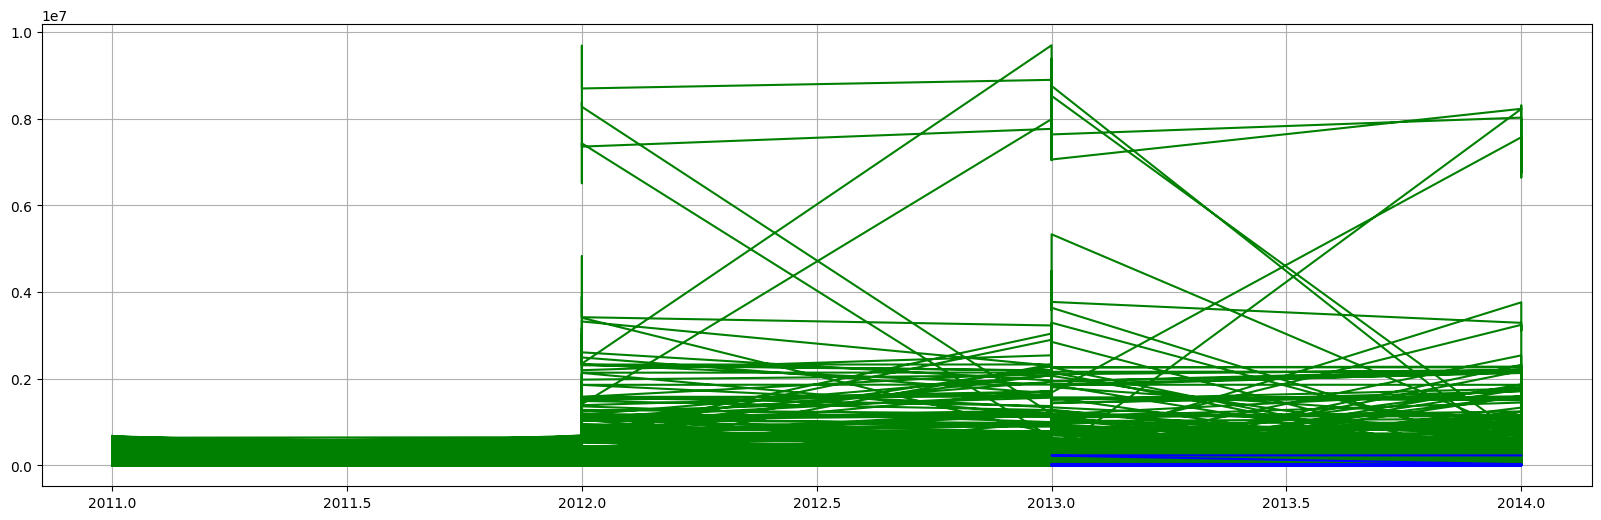

In [45]:
data_df.index = data_df['year']
data_df.sort_index()

# data_df.sort_values(by=['year'])

# train_data = data_df[data_df['year']<=2013]['kwh_usage']
# test_data = data_df[data_df['year']==2014]['kwh_usage']

train_data = data_df['kwh_usage'][:-100]
test_data = data_df['kwh_usage'][-100:]

plt.figure(figsize=(20, 6))
plt.grid(True)
plt.plot(train_data, 'green', label='Train_data')
plt.plot(test_data, 'blue', label='Test Data')


# train_data = data_df[['kwh_usage']][:-100]
# test_data = data_df[['kwh_usage']][-100:]
# Create a matplotlib figure with multiple subplots
# fig, axes = plt.subplots(1, 2, figsize=(50, 10))
# axes = axes.flatten()
# date_cols = [ 'year']

# # Plot each plot on a separate subplot
# for i in range(len(date_cols)):
#   sns.lineplot(data=train_data, x=date_cols[i], y='kwh_usage', ax=axes[i])
#   sns.lineplot(data=test_data, x=date_cols[i], y='kwh_usage', ax=axes[i])
#   axes[i].set_xlabel(date_cols[i])
#   axes[i].set_ylabel('ksw_usage')
#   axes[i].set_title('Plot for kwh_usage w.r.t {}'.format(date_cols[i]))

# # Adjust the layout and spacing of the subplots
# plt.tight_layout()

# # Show the plot
# plt.show()

<Axes: xlabel='year', ylabel='kwh_usage'>

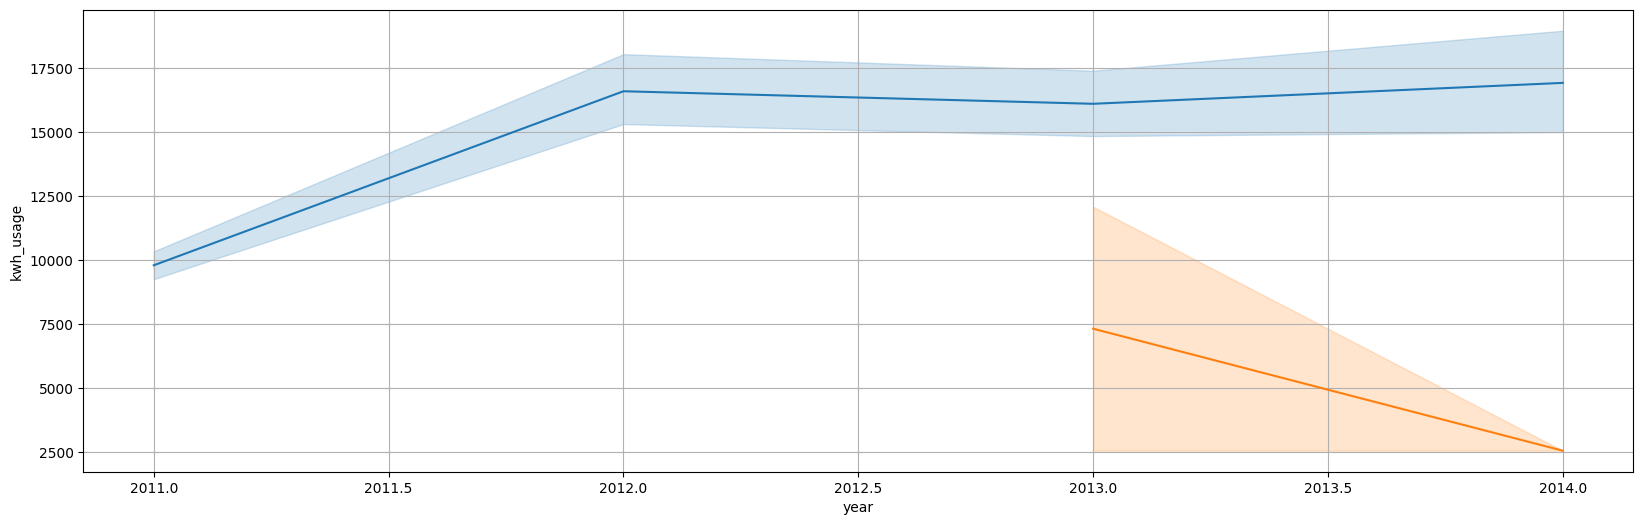

In [63]:
data_df.index = data_df['year']
data_df.sort_index()

# data_df.sort_values(by=['year'])

# train_data = data_df[data_df['year']<=2013]['kwh_usage']
# test_data = data_df[data_df['year']==2014]['kwh_usage']

train_data = data_df['kwh_usage'][:-10]
test_data = data_df['kwh_usage'][-10:]

plt.figure(figsize=(20, 6))
plt.grid(True)
# plt.plot(train_data, 'green', label='Train_data')
# plt.plot(test_data, 'blue', label='Test Data')
sns.lineplot(train_data) #'green', label='Train_data'
sns.lineplot(test_data) #, 'blue', label='Test Data'

In [64]:
from statsmodels.tsa.arima.model import ARIMA

# plt.figure(figsize=(16, 8))
# model = ARIMA(ts_log, order=(0, 0, 0))
# results = model.fit(disp=1)
# plt.plot(ts_log_diff)
# plt.plot(results.fittedvalues, color='red')

train = list(train_data)
test = list(test_data)

model_predictions = []
n_test_obser = len(test)

for i in range(n_test_obser):
  model = ARIMA(train, order = (4, 1, 0))
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  model_predictions.append(yhat)
  actual_test_value = test[i]
  train.append(actual_test_value)

In [65]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               190847
Model:                 ARIMA(4, 1, 0)   Log Likelihood            -2375142.910
Date:                Tue, 25 Apr 2023   AIC                        4750295.821
Time:                        13:31:08   BIC                        4750346.617
Sample:                             0   HQIC                       4750310.802
                             - 190847                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0735      0.000   -459.410      0.000      -0.074      -0.073
ar.L2         -0.0002      0.000     -0.592      0.554      -0.001       0.000
ar.L3         -0.0496      0.000   -240.015      0.0

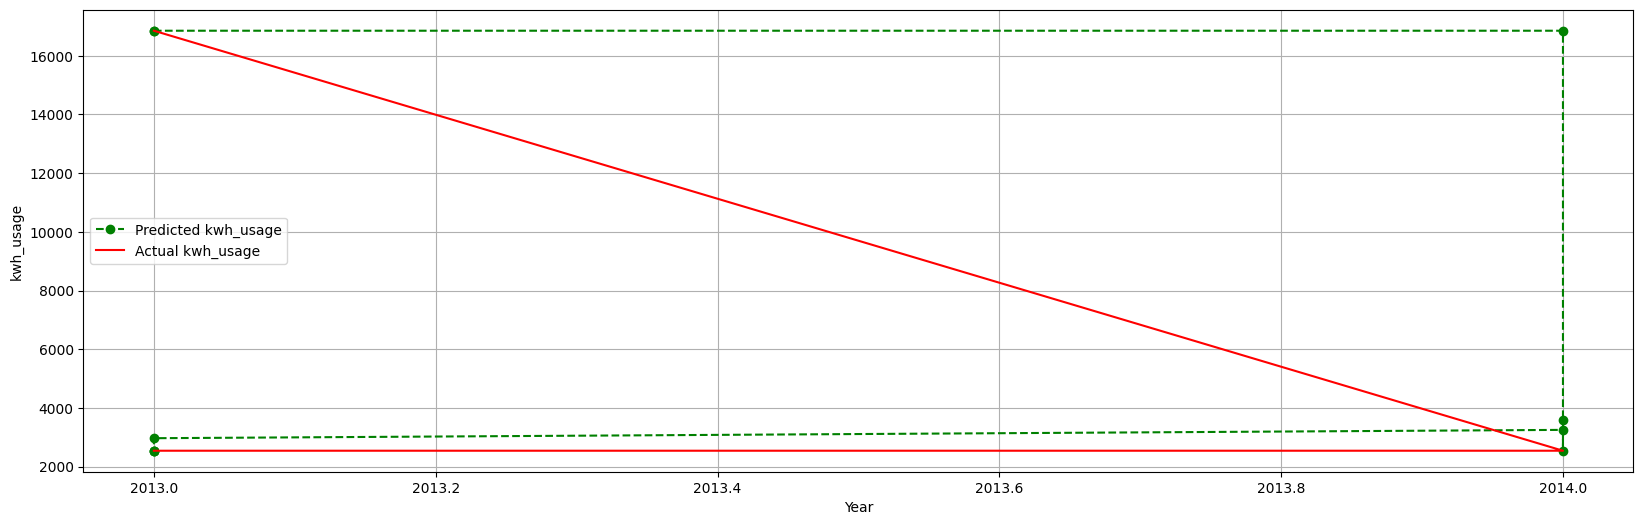

In [67]:
plt.figure(figsize=(20, 6))
plt.grid(True)

date_range=data_df[-10:].index

plt.plot(date_range, model_predictions, color='green', marker='o', linestyle='dashed', label='Predicted kwh_usage')
plt.plot(date_range, test_data, color='red', label='Actual kwh_usage')

plt.legend()
plt.xlabel('Year')
plt.ylabel('kwh_usage')
plt.show()

In [68]:
#MAPE - Mean Absolute Percentage Error

mape = np.mean(np.abs(np.array(model_predictions) - np.array(test_data))/np.abs(test_data))
print('MAPE: '+str(mape))

MAPE: 0.6486296939737807


In [124]:
# reading the merged data
# data_main = pd.read_csv('Electricity_Usage_Data.csv')

# data = pd.concat(df_list)
# data.shape - (257028, 7)
# data_main.shape - (190848, 7)

In [125]:
# data_main.head()

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage
0,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-06-29,14890.12,161196.0
1,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-30,14468.32,155615.0
2,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-01,14024.32,142801.0
3,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-03-29,12986.58,131972.0
4,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-02-28,10612.81,100461.0


In [141]:
# address_enc = LabelEncoder()
# bill_type_enc = LabelEncoder()

# data_main['bill_date']=pd.to_datetime(data_main['bill_date'])
# data_main['address_enc'] = address_enc.fit_transform(data_main['service_address'])
# data_main['bill_type_enc'] = bill_type_enc.fit_transform(data_main['bill_type'])
# data_main['year'] = data_main['bill_date'].apply(lambda x: x.year) #int(x[0:4])
# data_main['month'] = data_main['bill_date'].apply(lambda x: x.month) # int(x[5:7])

In [142]:
# data_main.dtypes

esid                       object
business_area               int64
service_address            object
bill_type                  object
bill_date          datetime64[ns]
total_due                 float64
kwh_usage                 float64
address_enc                 int64
bill_type_enc               int64
year                        int64
month                       int64
dtype: object

In [143]:
# data_main.head()

,esid,business_area,service_address,bill_type,bill_date,total_due,kwh_usage,address_enc,bill_type_enc,year,month
0,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-06-29,14890.12,161196.0,1630,2,2012,6
1,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-30,14468.32,155615.0,1630,2,2012,5
2,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-05-01,14024.32,142801.0,1630,2,2012,5
3,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-03-29,12986.58,131972.0,1630,2,2012,3
4,1008901000140220013100,2500,17000 ALDINE WFLD,T,2012-02-28,10612.81,100461.0,1630,2,2012,2


In [128]:
from statsmodels.tsa.api import VAR

In [144]:
X = data_main[[
    'business_area', 
    'address_enc', 
    'bill_type_enc',
    'bill_date',
    'year', 
    'month',
    'kwh_usage',
]]
X.set_index('bill_date', inplace=True)

<Axes: xlabel='bill_date'>

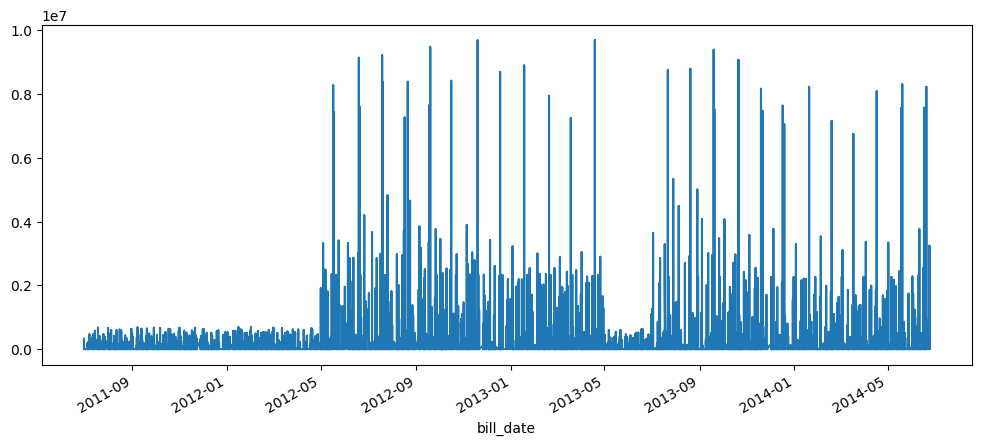

In [149]:
X['kwh_usage'].plot(figsize=(12, 5))

In [151]:
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# from matplotlib import pyplot

# X_new = X['kwh_usage'].values
# size = int(len(X_new) * 0.66)
# train, test = X_new[0:size], X_new[size:len(X_new)]
# history = [x for x in train]
# predictions = list()

In [154]:
# # walk-forward validation
# for t in range(len(test)):
#  model = ARIMA(history, order=(5,1,0))
#  model_fit = model.fit()
#  output = model_fit.forecast()
#  yhat = output[0]
#  predictions.append(yhat)
#  obs = test[t]
#  history.append(obs)
#  print('predicted=%f, expected=%f' % (yhat, obs))

# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.

KeyboardInterrupt: ignored

In [155]:
# model=ARIMA(X['kwh_usage'],order=(1,1,1))
# model_fit=model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels

In [ ]:
# model_fit.summary()

In [ ]:
# X['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
# X[['Sales','forecast']].plot(figsize=(12,8))

# VAR Model

In [156]:
model = VAR(endog=X)
model_fit = model.fit()
#Print a summary of the model results
model_fit.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 25, Apr, 2023
Time:                     03:50:20
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    37.6985
Nobs:                     190847.    HQIC:                   37.6969
Log likelihood:      -5.22187e+06    FPE:                2.35109e+16
AIC:                      37.6962    Det(Omega_mle):     2.35057e+16
--------------------------------------------------------------------
Results for equation business_area
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                 1434.642800      1247.409401            1.150           0.250
L1.business_area         0.933535         0.000821         1137.616           0.000
L1.address_enc           0.000777       

In [160]:
# Impulse Response Analysis
irf = model_fit.irf(20)

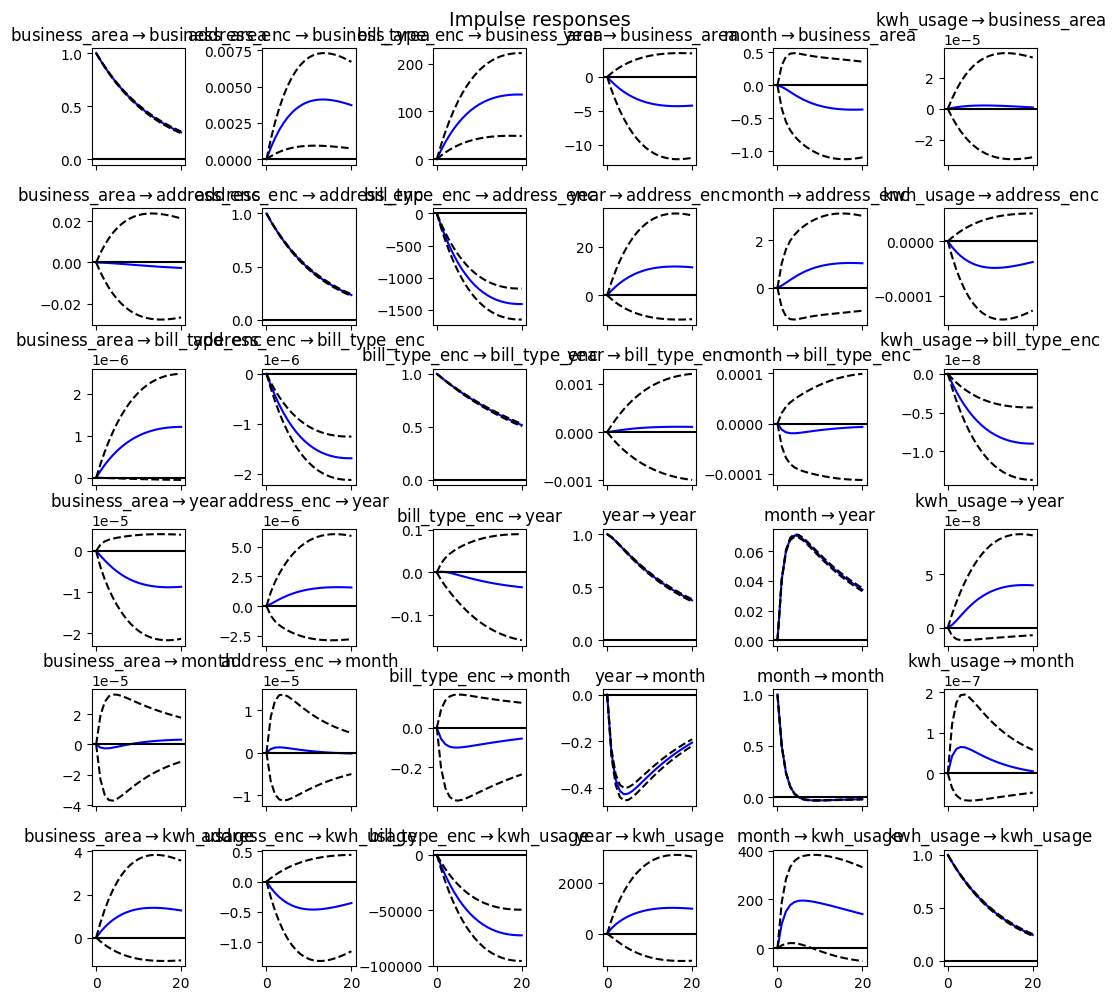

In [165]:
irf.plot()
plt.tight_layout(pad=0.001)
plt.show()

# LSTM Model

In [167]:
X.head()

,business_area,address_enc,bill_type_enc,year,month,kwh_usage
bill_date,,,,,,
2012-06-29,2500,1630,2,2012,6,161196.0
2012-05-30,2500,1630,2,2012,5,155615.0
2012-05-01,2500,1630,2,2012,5,142801.0
2012-03-29,2500,1630,2,2012,3,131972.0
2012-02-28,2500,1630,2,2012,2,100461.0


Text(0.5, 1.0, 'Kwh Usage Monthly Basis')

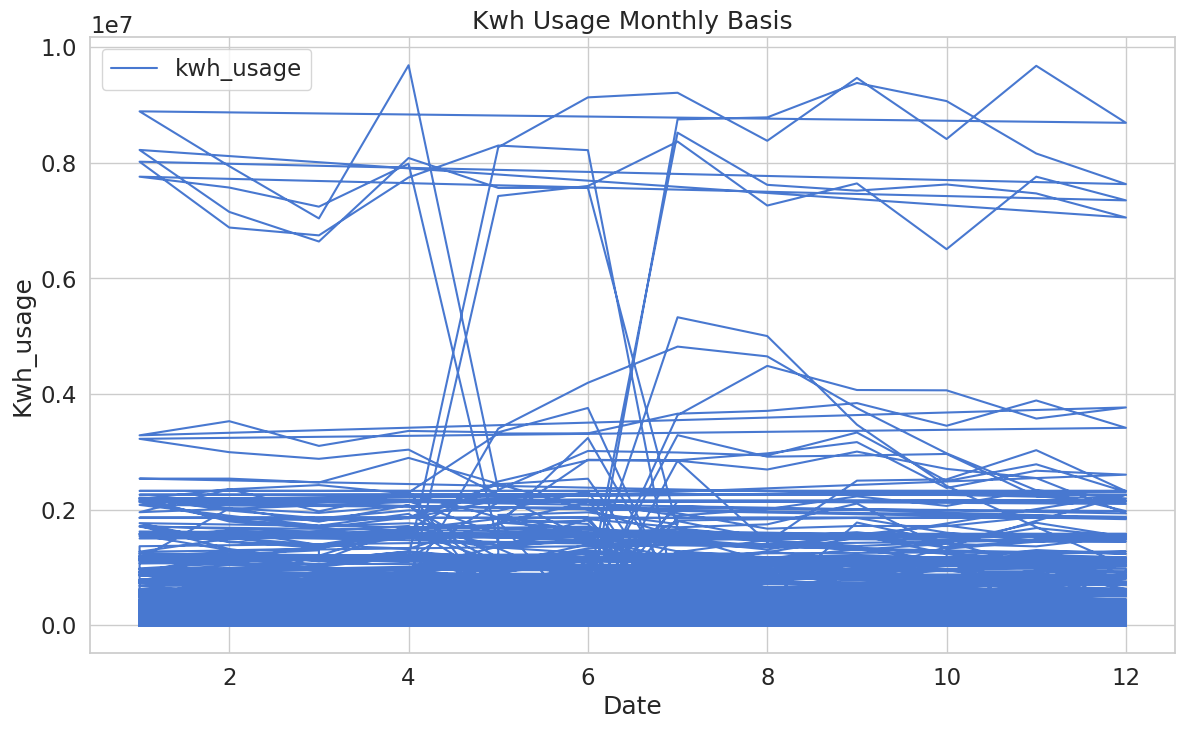

In [168]:
%matplotlib inline
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

rcParams['figure.figsize'] = 14, 8
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

# data plot
ax = X.plot(x='month', y='kwh_usage');
ax.set_xlabel('Month')
ax.set_ylabel('Kwh_usage')
ax.set_title('Kwh Usage Monthly Basis')

Text(0.5, 1.0, 'Kwh Usage Yearly Basis')

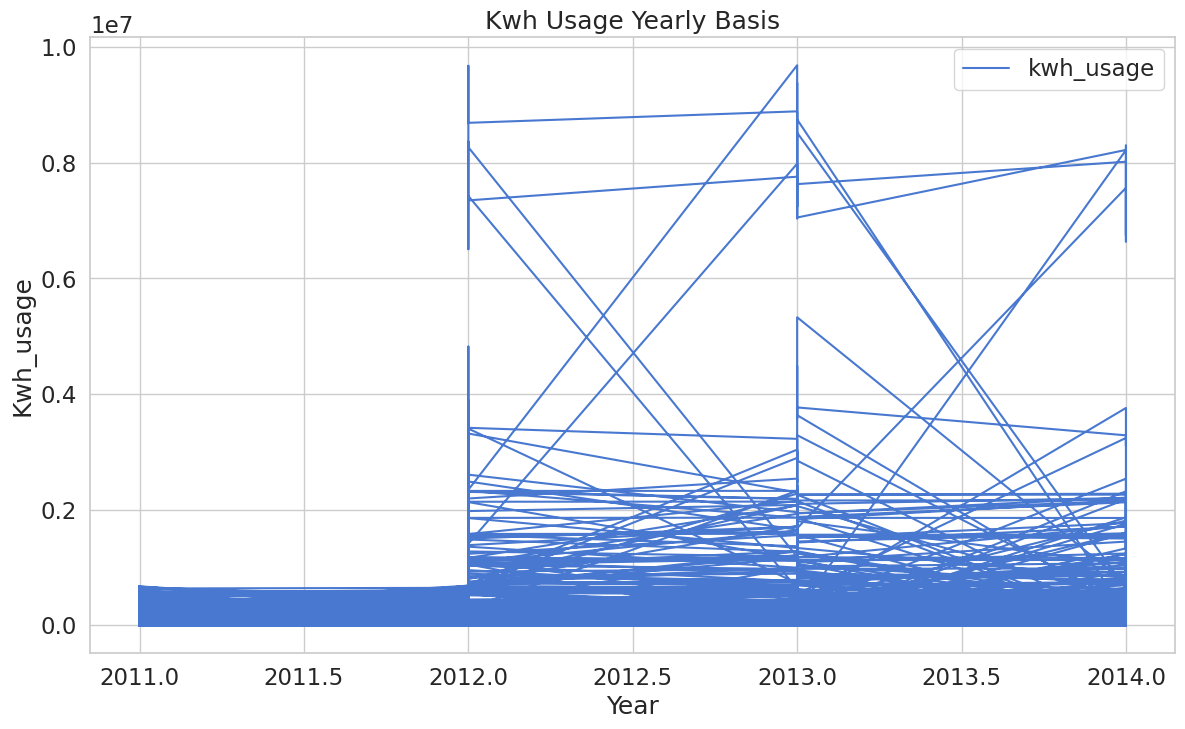

In [169]:
# data plot
ax = X.plot(x='year', y='kwh_usage');
ax.set_xlabel('Year')
ax.set_ylabel('Kwh_usage')
ax.set_title('Kwh Usage Yearly Basis')

Text(0.5, 1.0, 'Kwh Usage vs Date')

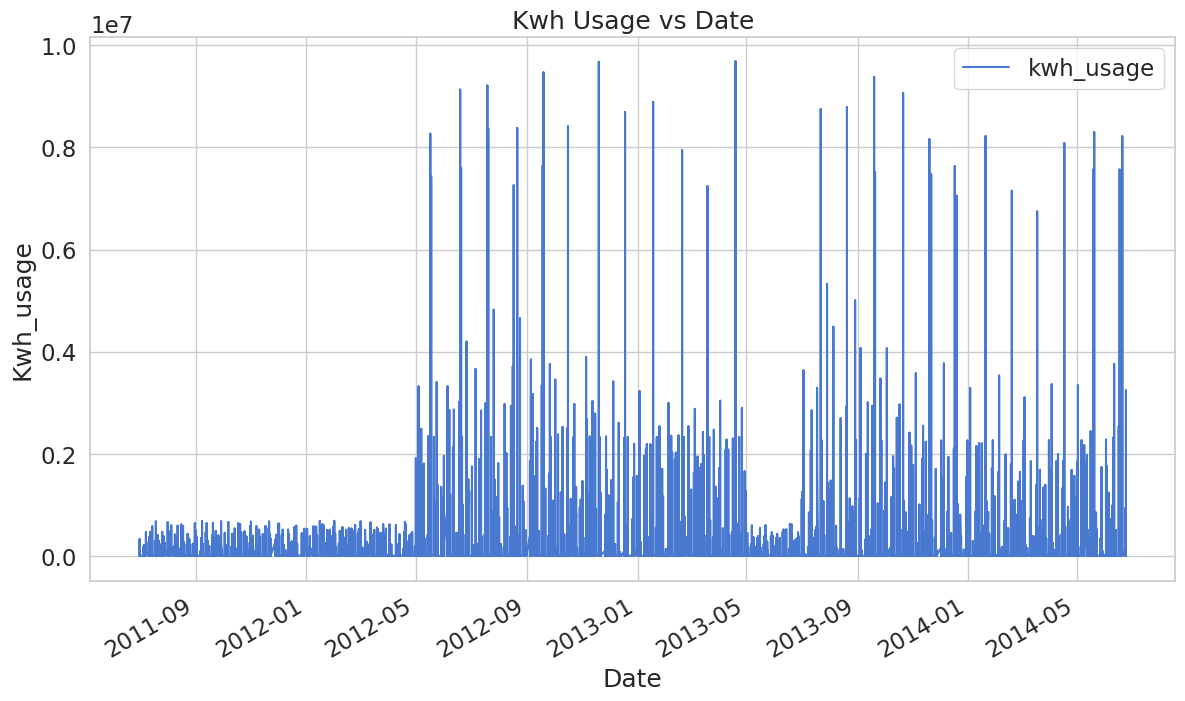

In [172]:
ax = X.plot(x='bill_date', y='kwh_usage');
ax.set_xlabel('Date')
ax.set_ylabel('Kwh_usage')
ax.set_title('Kwh Usage vs Date')

## Visualizations

In [ ]:
data_main = pd.read_csv('Electricity_Usage_Data.csv')

In [ ]:
data_main[['bill_date']] = data_main[['bill_date']].apply(pd.to_datetime)

In [ ]:
data_main.loc[:,'bill_date'] = data_main['bill_date'].apply(lambda x: pd.to_datetime(f'{x.year}-{x.month}-01'))

In [ ]:
viz_df = data_main.set_index('bill_date')

In [ ]:
viz_df.head()

,esid,business_area,service_address,bill_type,total_due,kwh_usage
bill_date,,,,,,
2012-06-01,1008901000140050014100,2000,10518 BELLAIRE,T,73232.11,905421.0
2012-05-01,1008901000140050014100,2000,10518 BELLAIRE,T,68463.46,824107.0
2012-04-01,1008901000140050014100,2000,10518 BELLAIRE,T,80847.87,977744.0
2012-03-01,1008901000140050014100,2000,10518 BELLAIRE,T,74373.93,876838.0
2012-02-01,1008901000140050014100,2000,10518 BELLAIRE,T,74080.27,872898.0


### Visualization #1 - Hyndavi

In [ ]:
def plotbox(df, column):
    plot_features = df.groupby(pd.Grouper(freq=str(60)+'T')).mean().copy()
    plot_features[column] = [eval('x.%s'%column) for x in plot_features.index] 
    plot_features.boxplot('kwh_usage', by=column, figsize=(12, 8), grid=False)
    plt.ylabel('kWh Usage')
    plt.xlabel(column)
    plt.show()

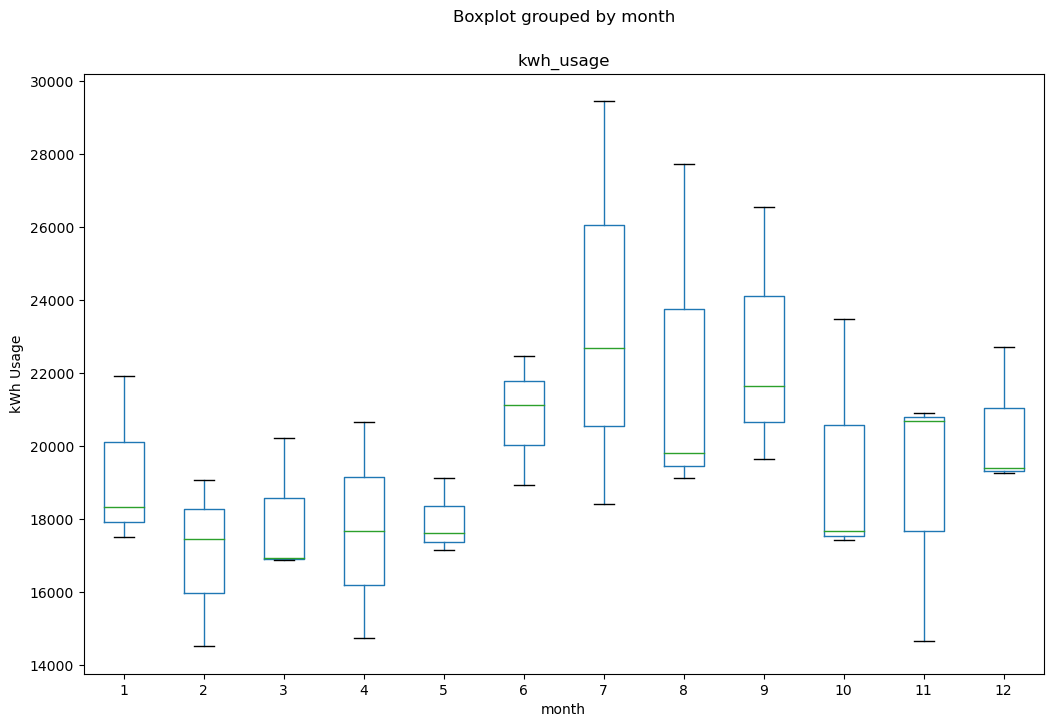

In [ ]:
plotbox(viz_df, 'month')

Based on the above box plot, we can see that the highest energy is consumed in the months of June-September. That is in the summer/fall season energy usage is quite high.

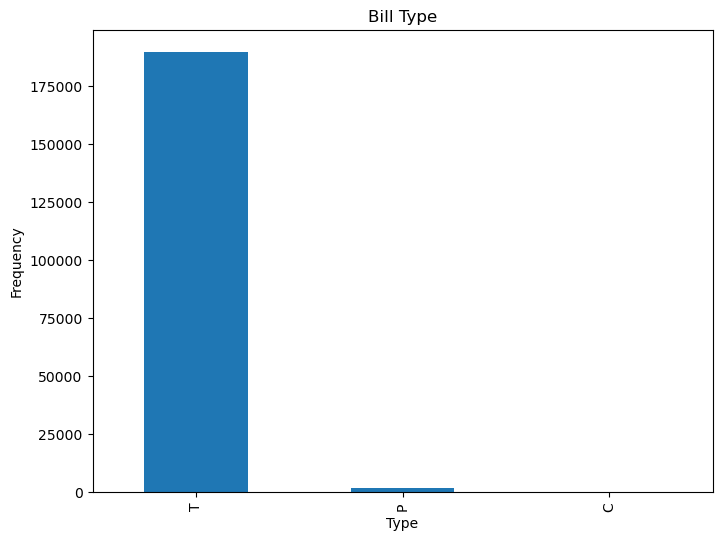

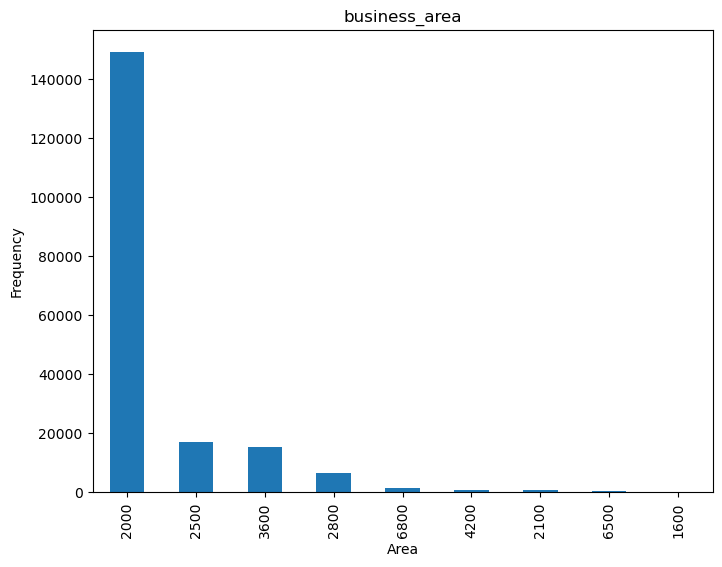

In [ ]:
# Bar chart for 'Bill Type'
plt.figure(figsize=(8, 6))
data_main['bill_type'].value_counts().plot(kind='bar')
plt.title('Bill Type')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

# Bar chart for 'Business Area'
plt.figure(figsize=(8, 6))
data_main['business_area'].value_counts().plot(kind='bar')
plt.title('business_area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.show()

The business area 2000 is the most populous area based on the frequency plot.

And the most common type of Bill type is T.

## Reflection

1. The hardest part of the project so far was the initial data cleaning process and making sense of the columns. So far the correlation between the features is still quite low so generating useful insights from these features is proving challenging. 

2. During Summer/Fall months there is quite high usage of energy. As well as there are few business areas where there is more usage of energy. This has been visualized as well.

3. The results so far are preliminary. We need to iterate further on these results and thhe observations in order to verify the conclusions befere we can confidently say that our observations are indeed correct.

4. The data might prove insufficient for few of the ML tasks that we are planning on performing. Therefore finding another data source which can be combined with these datasets is going to prove difficult in case the need arises.

5. Yes, we believe we are on track with the project. We have a plan to work on the models that have not yet been implemented and we are going to verify the work we have done so far before concluding the work.

6. The data as it stands right now is good as it has been useful to give the insights we have given so far. Once we are able to figure out the time-series and Clustering analysis part as well we would be able ot prove that the data is able to forecast as well and cluster high energy needing areas into groups.


## Next Work
We want to recheck our work done so far to verify the data cleaning and analysis that we have done. Once we get more confidence in the results we have presented here we want to work on the time series analysis and clustering analysis which is pending.
We will look for further resources to help get us started on these two model tasks.
The project would have achieved its goals if we are able to answer the hypotheses that we have come up with.


In the future, we want to group the households into specific groups based on the clustering analysis based on their energy usage and requirements. Using the generated labels from clustering and using them as the true labels for training in the classification would be interesting to see.

## References
1. [sklearn](https://scikit-learn.org/stable/)
2. [pandas](https://pandas.pydata.org/docs/)
3. [scipy](https://docs.scipy.org/doc/scipy/)
4. [data](https://data.world/houston/houston-electricity-bills)